In [10]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import pandas as pd
from functions import dirs, readFile, canonicalNames, corrMatrix
from wordEmbedders import WESCScore
import pickle
import chevron
from re import sub
from latexTable import LatexTable
import matplotlib.pyplot as plt

In [4]:
datasets = dirs('../data')
names = canonicalNames('../data')
dimensions = pickle.load(open('../data/Dimensions-All.pickle', mode="rb"))

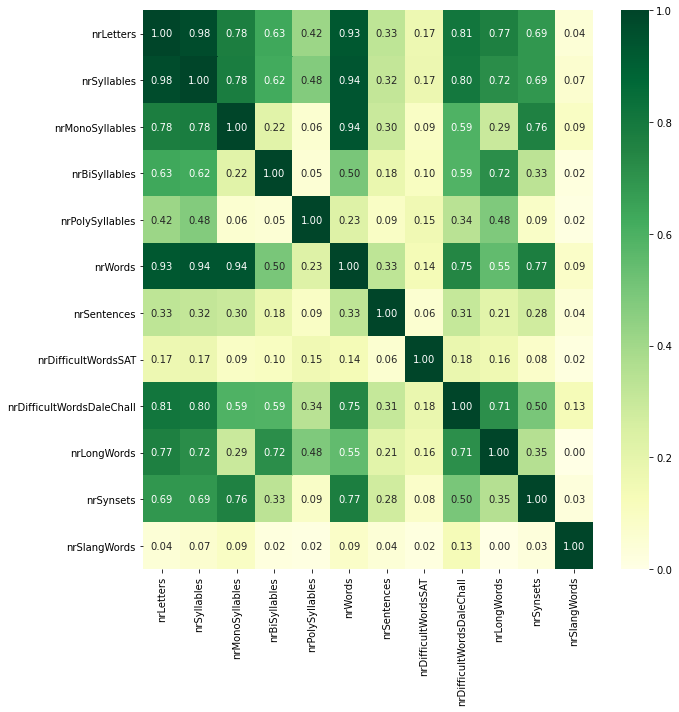

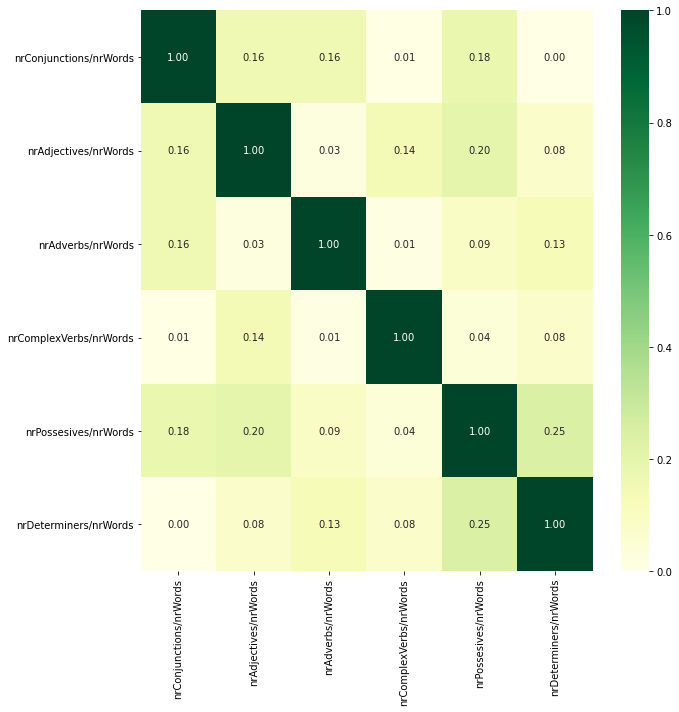

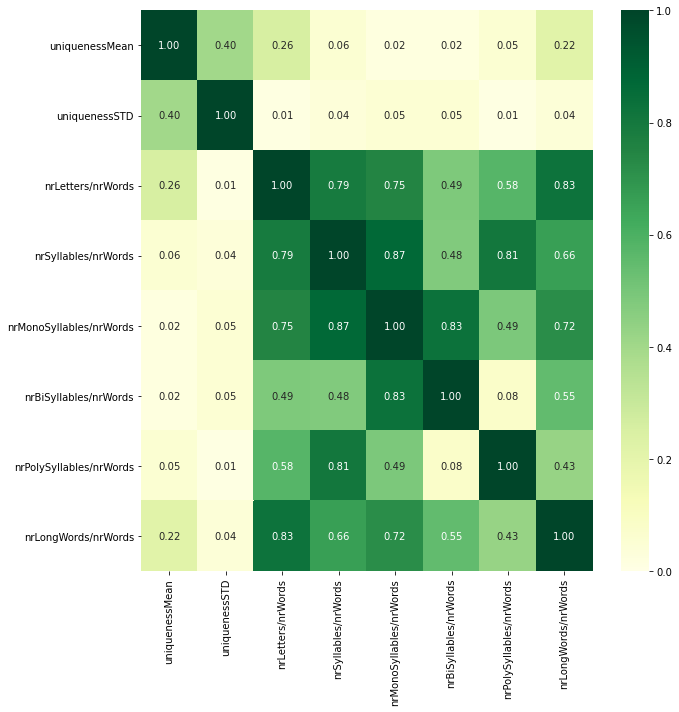

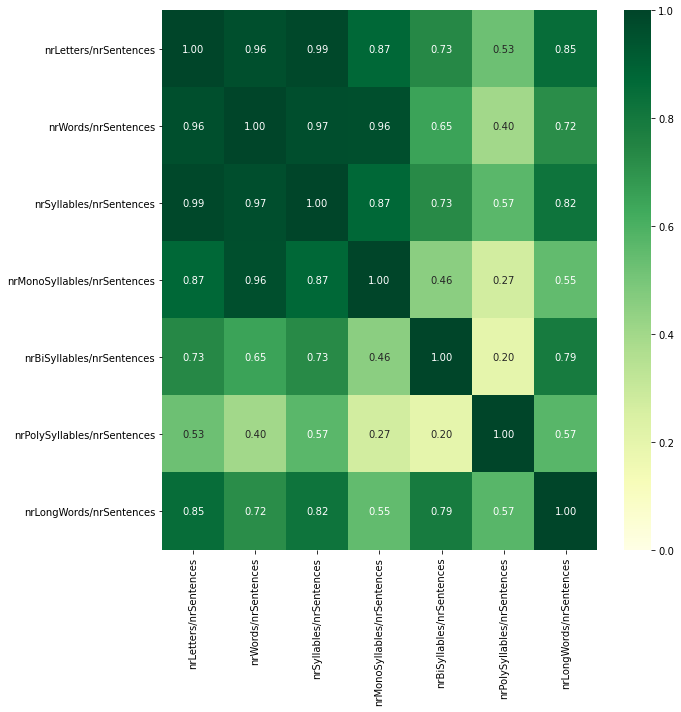

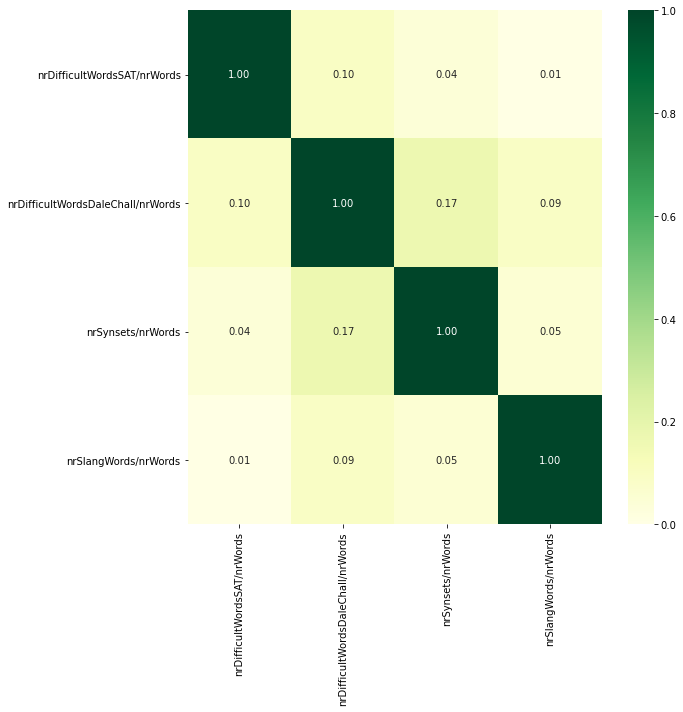

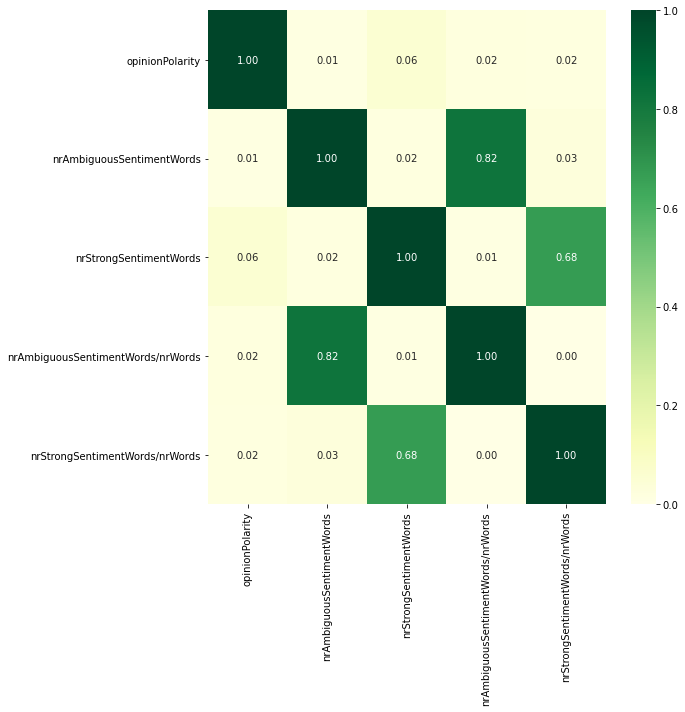

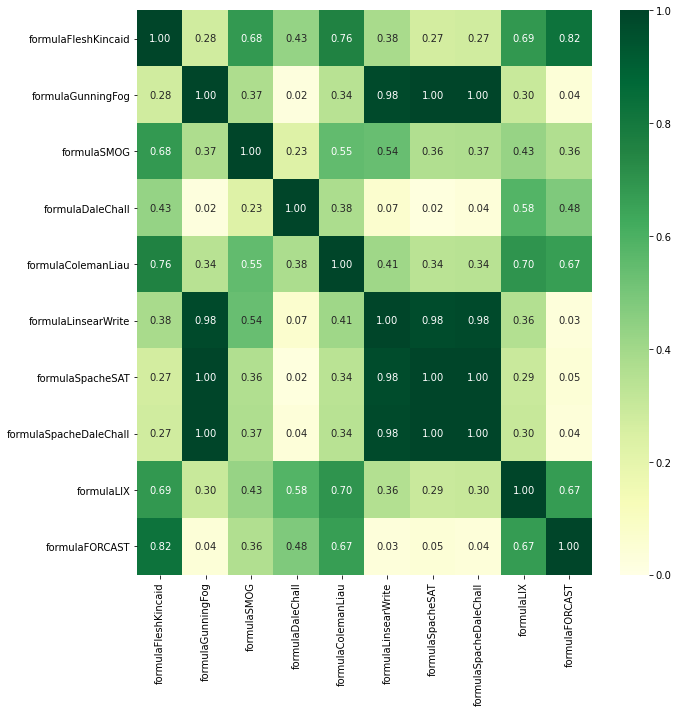

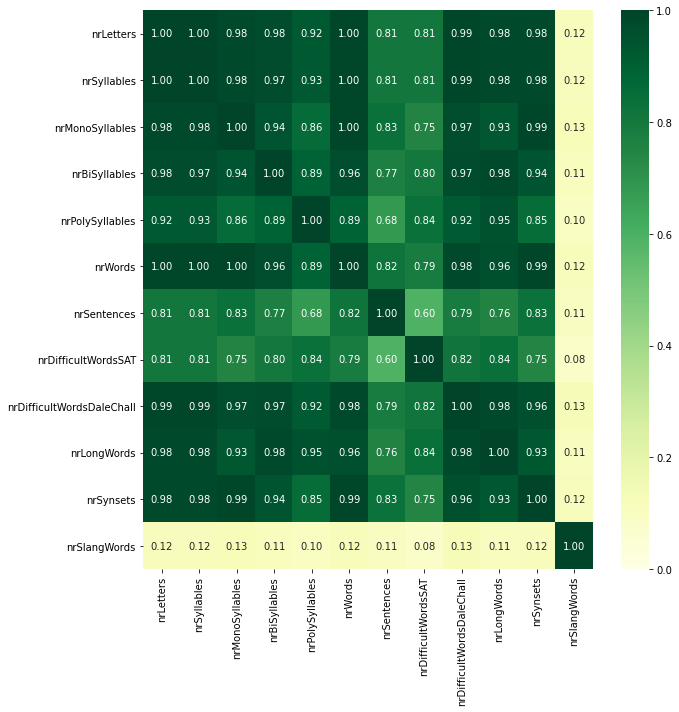

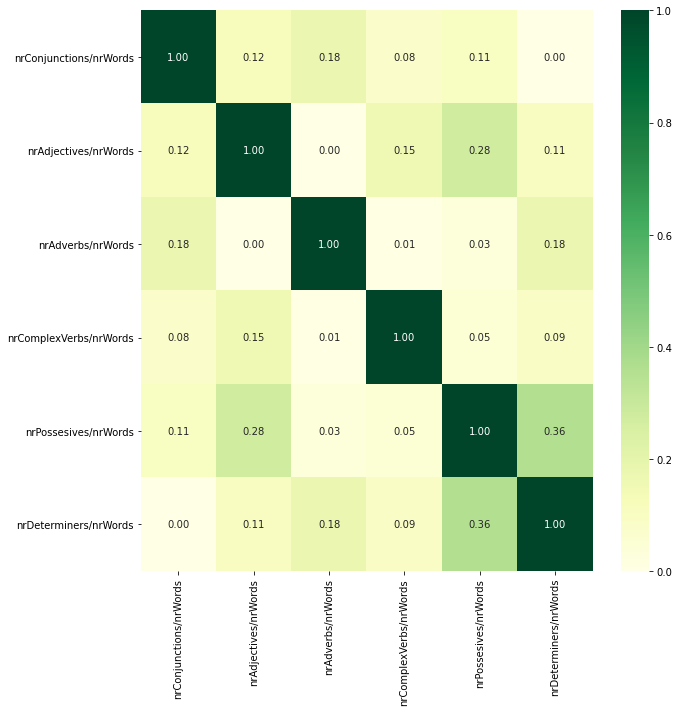

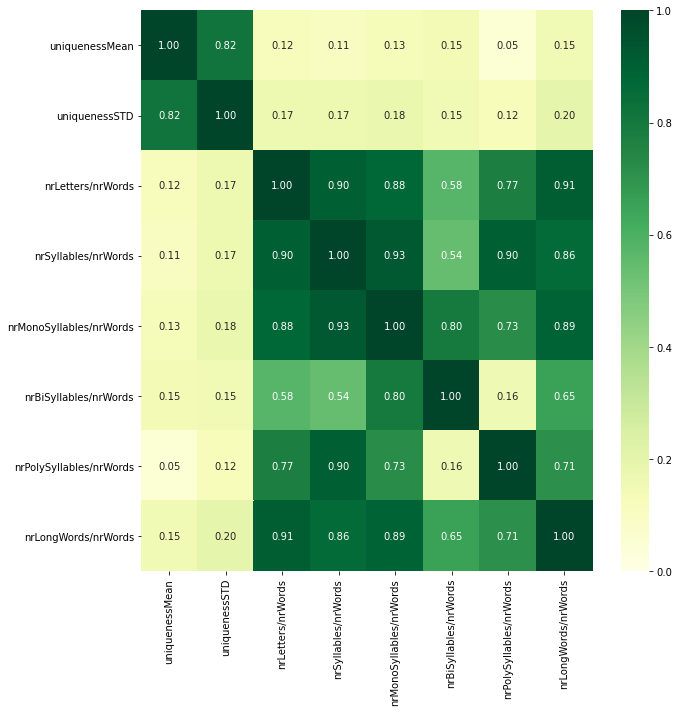

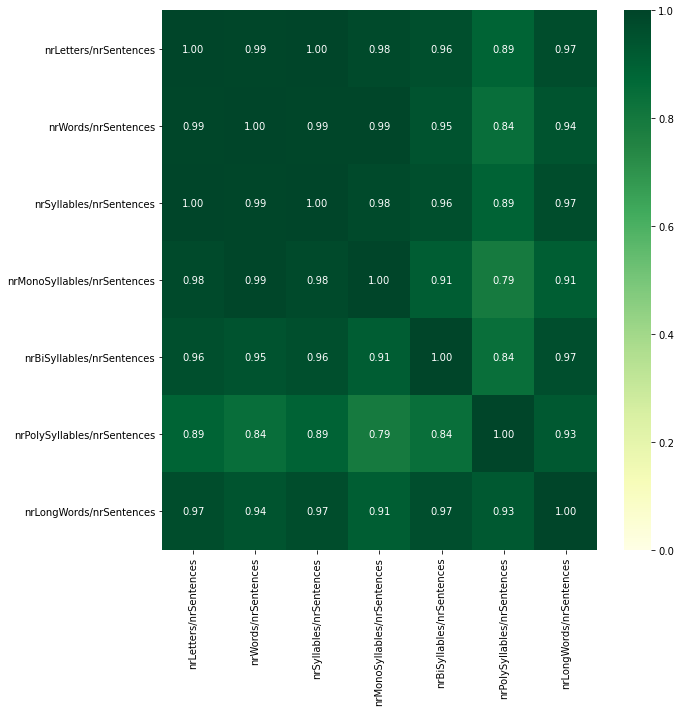

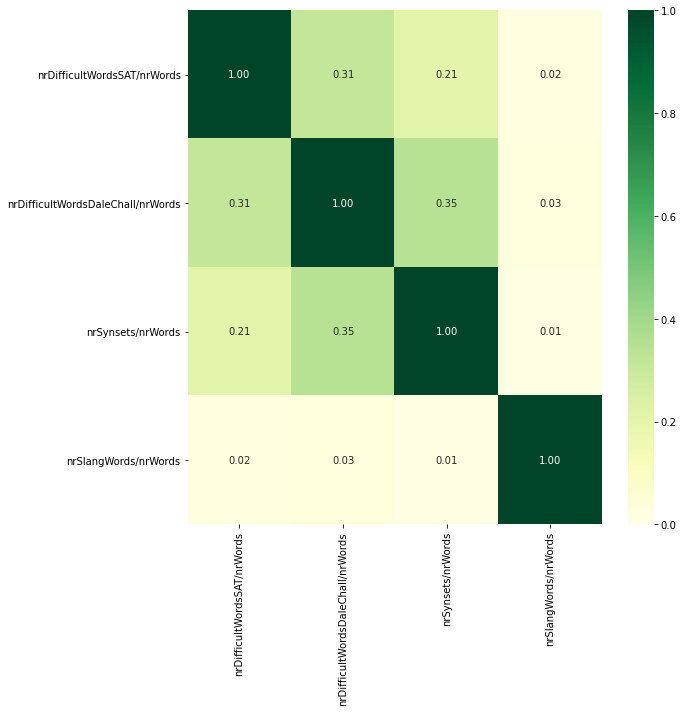

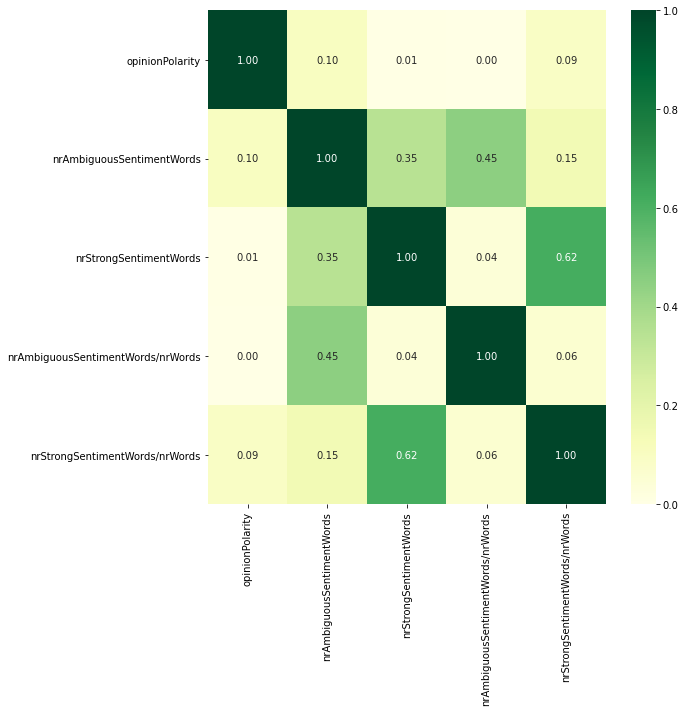

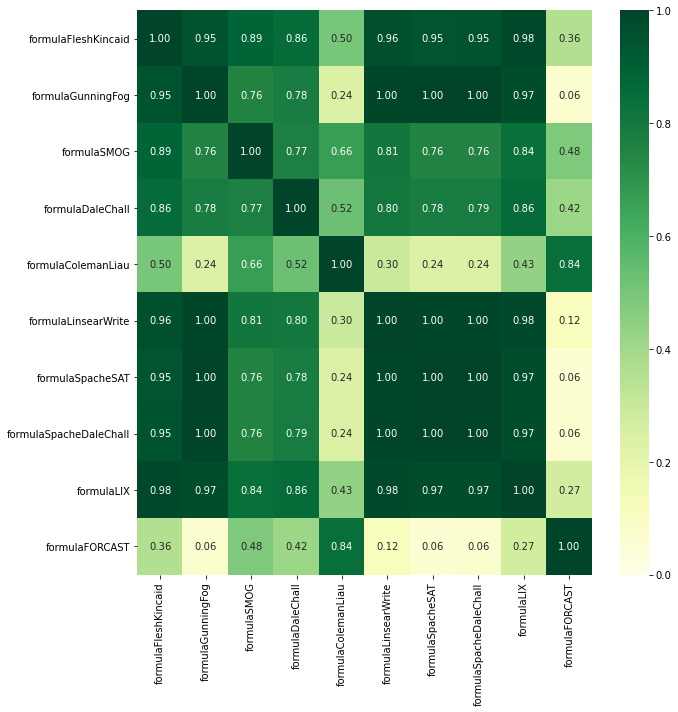

In [13]:
for dataset in datasets:
    dimsFile = f"../data/{dataset}/Dimensions.csv"
    dims = pd.read_csv(dimsFile)
    for aspect in [x for x in dimensions.keys() if not x == 'postag']:
        matrix = corrMatrix(dims[dimensions[aspect]])
        fig = matrix.get_figure()
        fig.patch.set_alpha(1)
        plt.tight_layout()
        fig.savefig(f'./Appendix-Correlations/{dataset}-{aspect}')